# 广告场景_岭回归法示例

上一个例子中，我们实现了电视（TV）、收音机（Radio）和报纸（Newspaper）广告投入与销售额预测回归分析  

本节人为增加两列列有收音机（Radio）广告投入有较强相关关系的数据列 test，分别用线性回归的岭回归的方法进行销售额预测，对比二种方法

In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## 读取数据
从文件中读入数据

In [2]:
#warnings.filterwarnings(action='ignore')
#np.set_printoptions(suppress=True)
path = '.\\Advertising.csv'
# pandas读入
data = pd.read_csv(path)
df = data[['TV', 'Radio', 'Newspaper']]


## 构造数据
构造收音机（Radio）广告投入这个因素有较强相关关系的数据列 test1 和 test2
> 为了教学方便，事实上工作中不会这么做

In [3]:
#生成200个值为0~20的A列
df1 = pd.DataFrame(np.random.uniform(0, 20, size=(200, 1)), columns=list('A')) #均匀分布
df2 = pd.DataFrame(np.random.uniform(0, 10, size=(200, 1)), columns=list('B')) #均匀分布
# print('df1:\n',df1)

df['test1'] = df['Radio'] + df1['A']  # 追加一个列名为test1的列
df['test2'] = df['Radio'] + df2['B']  # 追加一个列名为test2的列

print('df:\n',df)

df:
         TV  Radio  Newspaper      test1      test2
0    230.1   37.8       69.2  57.431550  45.431563
1     44.5   39.3       45.1  42.248565  46.519541
2     17.2   45.9       69.3  58.780978  54.654518
3    151.5   41.3       58.5  51.678198  51.194914
4    180.8   10.8       58.4  28.362291  11.533933
..     ...    ...        ...        ...        ...
195   38.2    3.7       13.8  18.550698   5.563024
196   94.2    4.9        8.1  14.753886  12.918684
197  177.0    9.3        6.4  16.841216   9.649413
198  283.6   42.0       66.2  44.939690  47.128078
199  232.1    8.6        8.7  18.212583   9.393082

[200 rows x 5 columns]


<ipython-input-3-d58528949964>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test1'] = df['Radio'] + df1['A']  # 追加一个列名为test1的列


增加后的结果：

```
 TV  Radio  Newspaper      test1      test2
0    230.1   37.8       69.2  49.960375  45.122703
1     44.5   39.3       45.1  40.478831  41.129792
2     17.2   45.9       69.3  50.524257  53.646255
3    151.5   41.3       58.5  60.325236  46.029513
4    180.8   10.8       58.4  20.721356  16.101270
..     ...    ...        ...        ...        ...
195   38.2    3.7       13.8   6.005832   7.079213
196   94.2    4.9        8.1  17.433418   9.981481
197  177.0    9.3        6.4  29.199468  12.872483
198  283.6   42.0       66.2  53.702705  45.716212
199  232.1    8.6        8.7  19.298708  17.981893
[200 rows x 5 columns]
```


## 分析5个因素间的相关系数
test1 与 test2 和 Radio具有很强的相关性  
分析相关性  




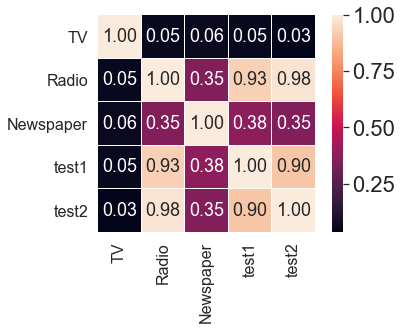

In [8]:

def snsPlot(df):
    # plt.figure(figsize=(8, 6), dpi=80)
    cm = np.corrcoef(df.values.T)
    # 控制颜色刻度即颜色深浅
    sns.set(font_scale=2)
    # 构造关联矩阵
    cols = ['TV', 'Radio', 'Newspaper', 'test1','test2']
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
        'size': 18}, linewidths=.2, vmax=1.0, yticklabels=cols, xticklabels=cols)
    plt.xticks(rotation=90, fontsize=16)  # 将字体进行旋转
    plt.yticks(rotation=360, fontsize=16)
    plt.show()
    
    
snsPlot(df)

## 代入模型
应用这5个特征和｛TV, Radio｝2个特征分别代入：普通最小二乘和岭回归中进行销售价的预测

### 应用线性回归基本理论
- **数据集划分**  
广告投放与销售量数据进行切分，其中 80% 作为训练数据、20% 作为测试数据
- **模型选型**   
线性模型，建立线性回归模型
- **模型训练**  
使用训练集训练模型
- **模型预测**  
使用测试集求得预测值
- **模型效果**
求得模型的均方误差、均方根误差评价指标


In [4]:
# 定义函数
def linearRegressionModel(x, y):
    # 将数据分为测试数据和训练数据二部分
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
    # print(type(x_test))
    # print(x_train.shape, y_train.shape)
    
    # 建立线性回归模型
    linearRegression = LinearRegression()
    
    # 模型训练
    model = linearRegression.fit(x_train, y_train)
    # print(model)# 求解f(x)=wx+b模型
        
    # 求得 w 和 b
    w = linearRegression.coef_
    b = linearRegression.intercept_
    
    
    order = y_test.argsort(axis=0)
    y_test = y_test.values[order]
    x_test = x_test.values[order, :]
    
    # 模型预测
    y_predict = linearRegression.predict(x_test)
    
    # 模型评价指标
    mse = np.average((y_predict - np.array(y_test)) ** 2)  # 均方误差
    rmse = np.sqrt(mse)  # 均方根误差
    
    # 确定系数
    R2_train=linearRegression.score(x_train, y_train) # 训练数据确定系数
    R2_test=linearRegression.score(x_test, y_test) # 测试数据确定系数
    
    #返回值
    return w,b,x_test,y_test,y_predict,mse,rmse,R2_train,R2_test


### 岭回归方法





In [5]:
def ridgeModel(x, y):
    # 将数据分为测试数据和训练数据二部分
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.8)
    
    # 最小绝对收缩选择算子--L1正则化
    # model = Lasso()
    
    # 岭回归模型--L2正则化
    model = Ridge()
    
    alpha_can = np.logspace(-3, 2, 10)
    
    np.set_printoptions(suppress=True)
    print('alpha_can = ', alpha_can)
    
    lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)# 自动搜索最优参数
    lasso_model.fit(x_train, y_train)
    alpha=lasso_model.best_params_
    #print('超参数：\n', alpha)

    order = y_test.argsort(axis=0)
    y_test = y_test.values[order]
    x_test = x_test.values[order, :]
    y_predict = lasso_model.predict(x_test)
    r2_test=lasso_model.score(x_test, y_test)
    
    mse = np.average((y_predict - np.array(y_test)) ** 2)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    
    #print(mse, rmse)
    return alpha,x_test,y_test,y_predict,mse,rmse,r2_test

辅助资料：  
np.logspace() 对数等比数列–常用参数及示例  
np.logspace(start=开始值，stop=结束值，num=元素个数，base=指定对数的底, endpoint=是否包含结束值)  
b = np.logspace(0,5,6,base=2)    # base指定对数的底为2  
array([ 1.,  2.,  4.,  8., 16., 32.])  

辅助材料：  
GridSearchCV的名字其实可以拆分为两部分，GridSearch和CV，即网格搜索和交叉验证。  
网格搜索，搜索的是参数，即在指定的参数范围内，按步长依次调整参数，利用调整的参数训练学习器，从所有的参数中找到在验证集上精度最高的参数，这其实是一个训练和比较的过程。k 折交叉验证将所有数据集分成 k 份，不重复地每次取其中一份做测试集，用其余 k-1 份做训练集训练模型，之后计算该模型在测试集上的得分,将 k 次的得分取平均得到最后的得分。  

GridSearchCV 可以保证在指定的参数范围内找到精度最高的参数，但是这也是网格搜索的缺陷所在，他要求遍历所有可能参数的组合，在面对大数据集和多参数的情况下，非常耗时。

GridSearchCV，它存在的意义就是自动调参，只要把参数输进去，就能给出最优化结果和参数。但是这个方法适合于小数据集，一旦数据的量级上去了，很难得到结果。

网格搜索可能是最简单，应用最广泛的超参数搜索算法，他通过查找搜索范围内的所有的点来确定最优值。如果采用较大的搜索范围及较小的步长，网格搜索很大概率找到全局最优值。然而这种搜索方案十分消耗计算资源和时间，特别是需要调优的超参数比较多的时候。因此在实际应用过程中，网格搜索法一般会先使用较广的搜索范围和较大的步长，来找到全局最优值可能的位置；然后再缩小搜索范围和步长，来寻找更精确的最优值。这种操作方案可以降低所需的时间和计算量，但由于目标函数一般是非凸的，所以很可能会错过全局最优值。



In [6]:

x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']  # 读入销售额信息数据

# 调用线性回归模型
wx, bx, x_testx, y_testx, y_predictx, msex, rmsex, r2_trainx, r2_testx = linearRegressionModel(x, y)
w, b, x_test, y_test, y_predict, mse, rmse, r2_train, r2_test = linearRegressionModel(df, y)
# 调用岭回归模型
alphax, x_test2, y_test2, y_predict2, mse2, rmse2, r2_test2 = ridgeModel(df, y)
alpha, x_test1, y_test1, y_predict1, mse1, rmse1, r2_test1=ridgeModel(x, y)

# 打印确定系数和均方根误差
print('线性回归：  R2_test = ', r2_test,' RMSE = ', rmse)
print('线性回归：  R2_testx = ', r2_testx, ' RMSEx = ', rmsex)
print('岭回归：  R2_test = ', r2_test1, ' RMSE = ', rmse1)
print('岭回归：  R2_testx = ', r2_test2, ' RMSEx = ', rmse2)


alpha_can =  [  0.001        0.00359381   0.0129155    0.04641589   0.16681005
   0.59948425   2.15443469   7.74263683  27.82559402 100.        ]
alpha_can =  [  0.001        0.00359381   0.0129155    0.04641589   0.16681005
   0.59948425   2.15443469   7.74263683  27.82559402 100.        ]
线性回归：  R2_test =  0.8960373998707034  RMSE =  1.3896119881302589
线性回归：  R2_testx =  0.8927605914615384  RMSEx =  1.4113417558581582
岭回归：  R2_test =  0.8927142790413892  RMSE =  1.411646474048539
岭回归：  R2_testx =  0.8956424333611508  RMSEx =  1.3922491379162425


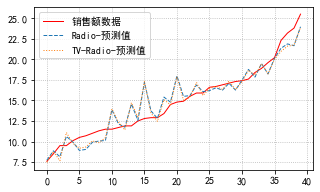

In [7]:

# 结果可视化


mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w', figsize=(5, 3))
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=1, label='销售额数据')
plt.plot(t, y_predict, '--', linewidth=1, label='Radio-预测值')
plt.plot(t, y_predict1, ':', linewidth=1, label='TV-Radio-预测值')
#plt.plot(t, y_predict2, '.', linewidth=1, label='TV-Radio-Newspaper预测值')
plt.legend(loc='upper left')
#plt.title('线性回归预测销售额', fontsize=10)
plt.grid(b=True, ls=':')
plt.show()

针对此案例，虽然都得到了比较理想的结果，但是，仍能看出，在增加了 test 特征因素后，线性回归 R2 降低约 0.036，RMSE 增加 0.023；而岭回归 R2 降低 0.035， RMSE 增加 0.022， 岭回归对多重共线性的处理比线性回归的鲁棒性要好一些